In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.signal import find_peaks


In [2]:
# Relative path to the data file in the parent directory
file_path = ('../data/dsc_fc_summed_spectra_2017_v01.csv')

# Read the CSV using pandas
data = pd.read_csv(file_path, header=None)
print(data.head())

                    0        1         2        3    4    5    6    7    8   \
0  2017-01-01 00:00:00 -4.17863 -4.511830 -3.52434  0.0  0.0  0.0  0.0  0.0   
1  2017-01-01 00:01:00 -6.06788 -0.379552 -3.49708  0.0  0.0  0.0  0.0  0.0   
2  2017-01-01 00:02:00 -5.83430 -3.039940 -2.98546  0.0  0.0  0.0  0.0  0.0   
3  2017-01-01 00:03:00 -5.87318 -3.352910 -2.77476  0.0  0.0  0.0  0.0  0.0   
4  2017-01-01 00:04:00 -5.81431 -3.305190 -2.59870  0.0  0.0  0.0  0.0  0.0   

    9   ...   44   45   46   47   48   49   50   51   52   53  
0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 54 columns]


In [3]:
plt.style.use('default')

In [4]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
count,524528.000000,524528.000000,524528.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,...,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,-0.251033,0.337114,-0.030254,9.680547,8.721720,25.564167,34.968124,51.384674,60.201335,85.959930,...,58.460499,41.496233,38.557738,28.786738,23.587986,16.275130,14.969062,12.264732,13.259206,10.475631
std,3.534637,3.650761,2.880760,47.737049,34.931175,76.667021,87.120034,110.112429,122.716087,156.605629,...,147.351050,117.515330,121.094123,104.824853,91.898263,79.451379,77.003466,68.319734,75.434849,63.335315
min,-20.060900,-20.647900,-33.324400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.935430,-2.128827,-1.518070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.393389,0.300102,-0.020699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.490950,2.656220,1.456775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,194.536000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.462200,27.893800,20.102800,462.628000,499.673000,587.183000,723.864000,929.494000,1735.030000,2270.620000,...,733.651000,622.058000,662.190000,861.944000,696.414000,890.223000,1084.300000,1183.310000,771.201000,846.254000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 54 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       525600 non-null  object 
 1   1       524528 non-null  float64
 2   2       524528 non-null  float64
 3   3       524528 non-null  float64
 4   4       525600 non-null  float64
 5   5       525600 non-null  float64
 6   6       525600 non-null  float64
 7   7       525600 non-null  float64
 8   8       525600 non-null  float64
 9   9       525600 non-null  float64
 10  10      525600 non-null  float64
 11  11      525600 non-null  float64
 12  12      525600 non-null  float64
 13  13      525600 non-null  float64
 14  14      525600 non-null  float64
 15  15      525600 non-null  float64
 16  16      525600 non-null  float64
 17  17      525600 non-null  float64
 18  18      525600 non-null  float64
 19  19      525600 non-null  float64
 20  20      525600 non-null  float64
 21  21      52

In [6]:
data[0]= pd.to_datetime(data[0])
data.replace(0, np.nan, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 54 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   0       525600 non-null  datetime64[ns]
 1   1       524528 non-null  float64       
 2   2       524528 non-null  float64       
 3   3       524528 non-null  float64       
 4   4       21227 non-null   float64       
 5   5       34889 non-null   float64       
 6   6       54529 non-null   float64       
 7   7       77869 non-null   float64       
 8   8       103292 non-null  float64       
 9   9       126193 non-null  float64       
 10  10      154014 non-null  float64       
 11  11      182378 non-null  float64       
 12  12      213968 non-null  float64       
 13  13      237368 non-null  float64       
 14  14      261878 non-null  float64       
 15  15      285524 non-null  float64       
 16  16      304794 non-null  float64       
 17  17      323529 non-null  floa

In [8]:
Bx = data.iloc[:, 1]
By = data.iloc[:, 2]
Bz = data.iloc[:, 3]
data['magnitude'] = ((Bx ** 2) + (By ** 2) + (Bz ** 2))**0.5

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,magnitude
0,2017-01-01 00:00:00,-4.17863,-4.511830,-3.52434,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.087914
1,2017-01-01 00:01:00,-6.06788,-0.379552,-3.49708,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.013758
2,2017-01-01 00:02:00,-5.83430,-3.039940,-2.98546,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.224491
3,2017-01-01 00:03:00,-5.87318,-3.352910,-2.77476,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.309962
4,2017-01-01 00:04:00,-5.81431,-3.305190,-2.59870,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.175216


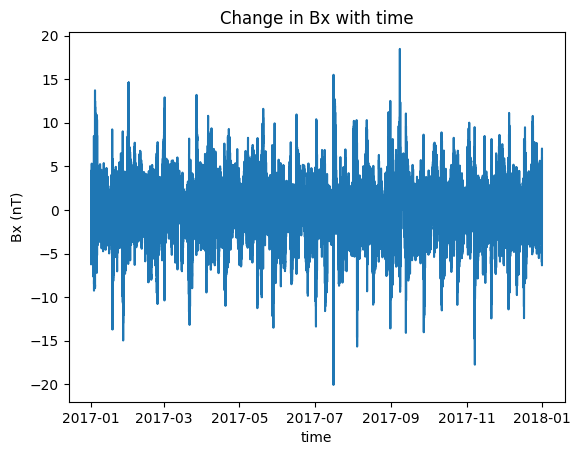

In [10]:
# Figure of Bx with time
date = data.iloc[:, 0]
plt.title('Change in Bx with time')
plt.xlabel('time')
plt.ylabel('Bx (nT)')
plt.plot(date, Bx)
plt.show()

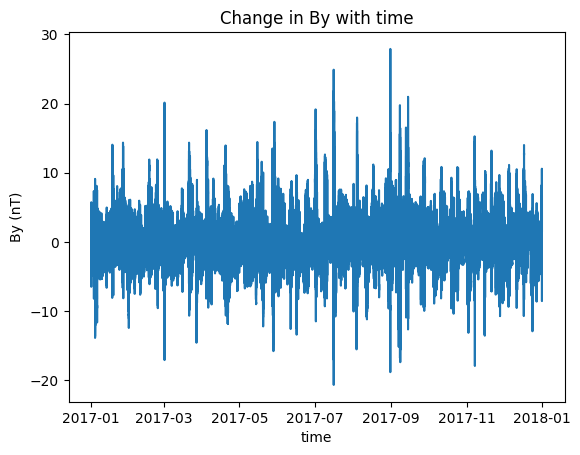

In [11]:
# Figure of By with time
date = data.iloc[:, 0]
plt.title('Change in By with time')
plt.xlabel('time')
plt.ylabel('By (nT)')
plt.plot(date, By)
plt.show()

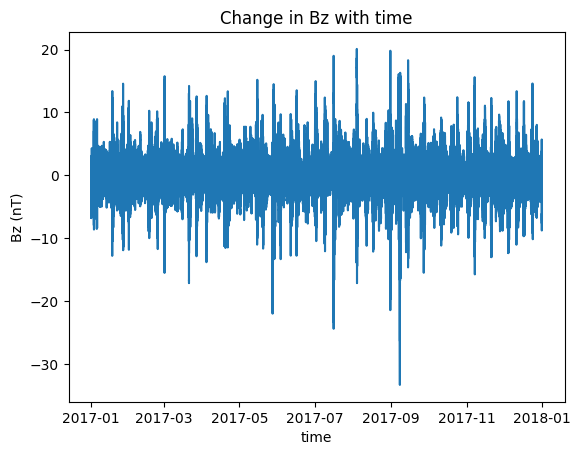

In [12]:
# Figure of Bz with time
date = data.iloc[:, 0]
plt.plot(date, Bz)
plt.title('Change in Bz with time')
plt.xlabel('time')
plt.ylabel('Bz (nT)')
plt.show()

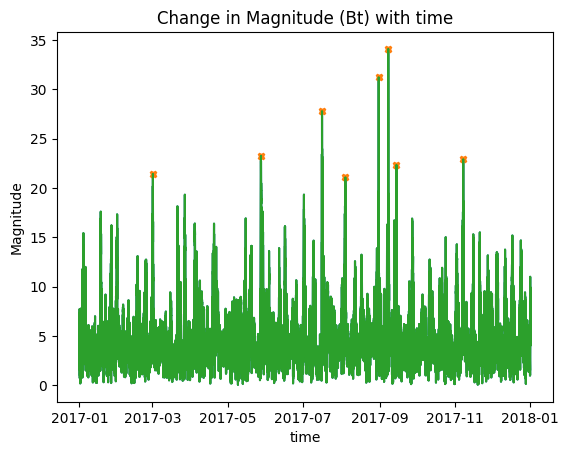

In [13]:
# Locate the Peaks above a Magnitude of 20
peaks, _ = find_peaks(data['magnitude'], height=20, prominence=19)
# Figure of magnitude (Bt) with time
date = data.iloc[:, 0]
plt.plot(date, data['magnitude'])
plt.plot(date[peaks], data['magnitude'][peaks], "X", markersize=5)
plt.plot(date, data['magnitude'])
plt.title('Change in Magnitude (Bt) with time')
plt.xlabel('time')
plt.ylabel('Magnitude')
plt.show()

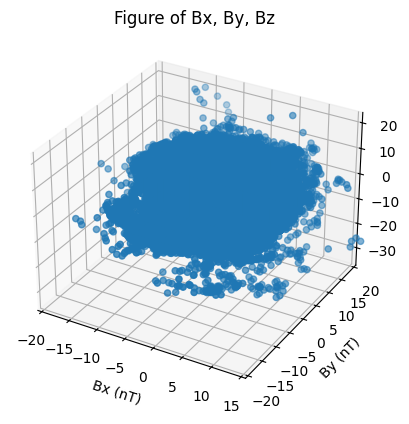

In [14]:
# Figure of Bx, By, Bz
# Matplotlib does not accomodate for third axes (z) but just note that the third axes is for 'Bz'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.xlim(-20, 15)
plt.ylim(-20, 20)
plt.title('Figure of Bx, By, Bz')
plt.xlabel('Bx (nT)')
plt.ylabel('By (nT)')
ax.scatter(Bx, By, Bz)
plt.show()

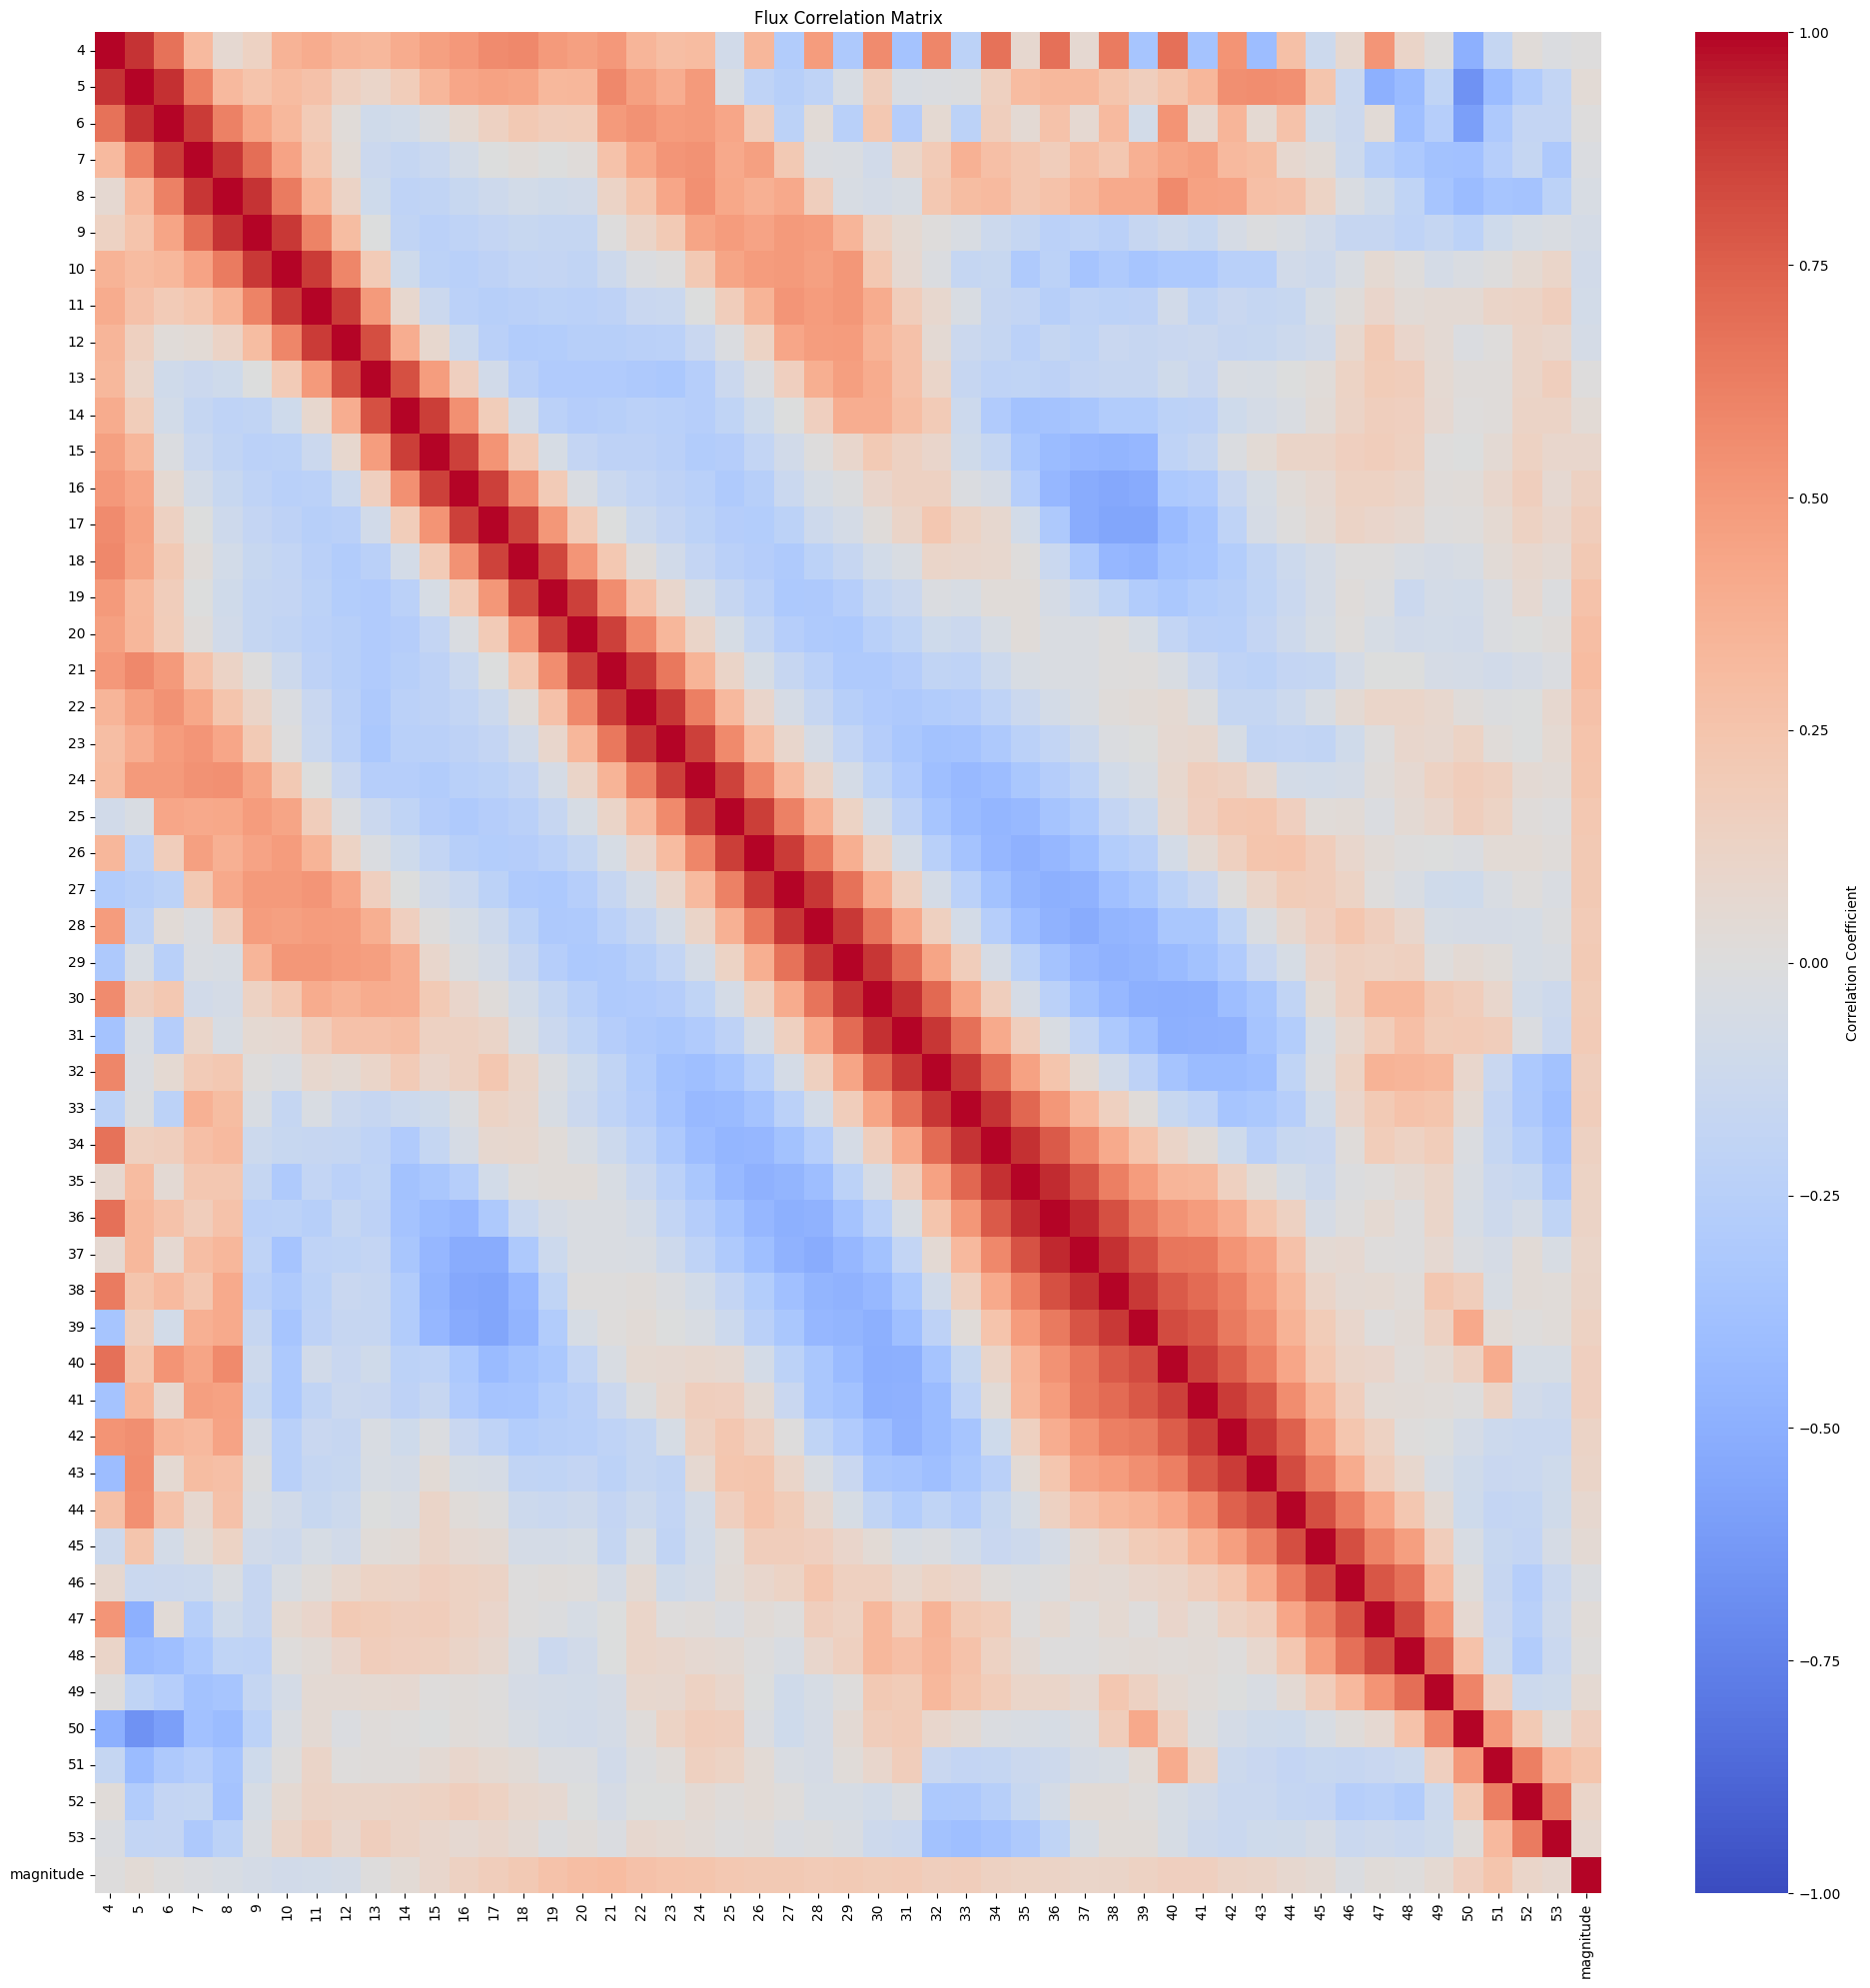

In [16]:
# Drop the 'Time', 'Bx', 'By', and 'Bz' columns to focus on the flux columns
flux_df = data.drop(columns=[0,1,2,3])

# Calculate the correlation matrix
corr_matrix = flux_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Flux Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [73]:
# Descriptive statistics for the flux data
print(flux_df.describe())


                  4             5             6             7              8  \
count  21227.000000  34889.000000  54529.000000  77869.000000  103292.000000   
mean     239.699232    131.392011    246.410643    236.027763     261.470244   
std       35.923133     47.583120     47.295791     61.437658      82.252300   
min      119.344000      0.231726      0.899638      0.231726       0.231726   
25%      202.977500     96.470300    226.407000    209.157000     224.734750   
50%      252.437000    141.739000    252.405000    236.164000     253.396500   
75%      260.098000    150.871000    261.094000    248.641000     268.143250   
max      462.628000    499.673000    587.183000    723.864000     929.494000   

                   9             10             11             12  \
count  126193.000000  154014.000000  182378.000000  213968.000000   
mean      250.741495     293.353457     298.244277     382.796637   
std       122.254387     151.186576     189.280453     151.996659   
min

In [95]:
# Drop the 'Bx', 'By', and 'Bz' columns to focus on the flux columns
flux_data = data.drop(columns=[1,2,3])

# Set 'Time' as the index for the heatmap
flux_data.set_index(flux_data.columns[0], inplace=True)

#Compute descriptive statistics
stats = flux_data.describe()

# Transpose the result to have the flux types as rows
stats_T = stats.transpose()

# Select specific rows
specific_rows = stats_T.loc[[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,41,42,43,44,45,46,47,48,49,50,51,52,53]]
specific_rows

,count,mean,std,min,25%,50%,75%,max
4,21227.0,239.699232,35.923133,119.344000,202.97750,252.4370,260.09800,462.628
5,34889.0,131.392011,47.583120,0.231726,96.47030,141.7390,150.87100,499.673
6,54529.0,246.410643,47.295791,0.899638,226.40700,252.4050,261.09400,587.183
7,77869.0,236.027763,61.437658,0.231726,209.15700,236.1640,248.64100,723.864
8,103292.0,261.470244,82.252300,0.231726,224.73475,253.3965,268.14325,929.494
9,126193.0,250.741495,122.254387,0.231726,195.21100,226.0780,254.26100,1735.030
10,154014.0,293.353457,151.186576,0.231726,219.62950,252.7175,300.77000,2270.620
11,182378.0,298.244277,189.280453,0.231726,196.73525,235.3570,321.79000,2948.610
12,213968.0,382.796637,151.996659,0.231726,292.80700,325.8695,419.94075,2449.860
13,237368.0,342.887394,181.981164,0.231726,226.50175,276.2095,422.07425,2210.600


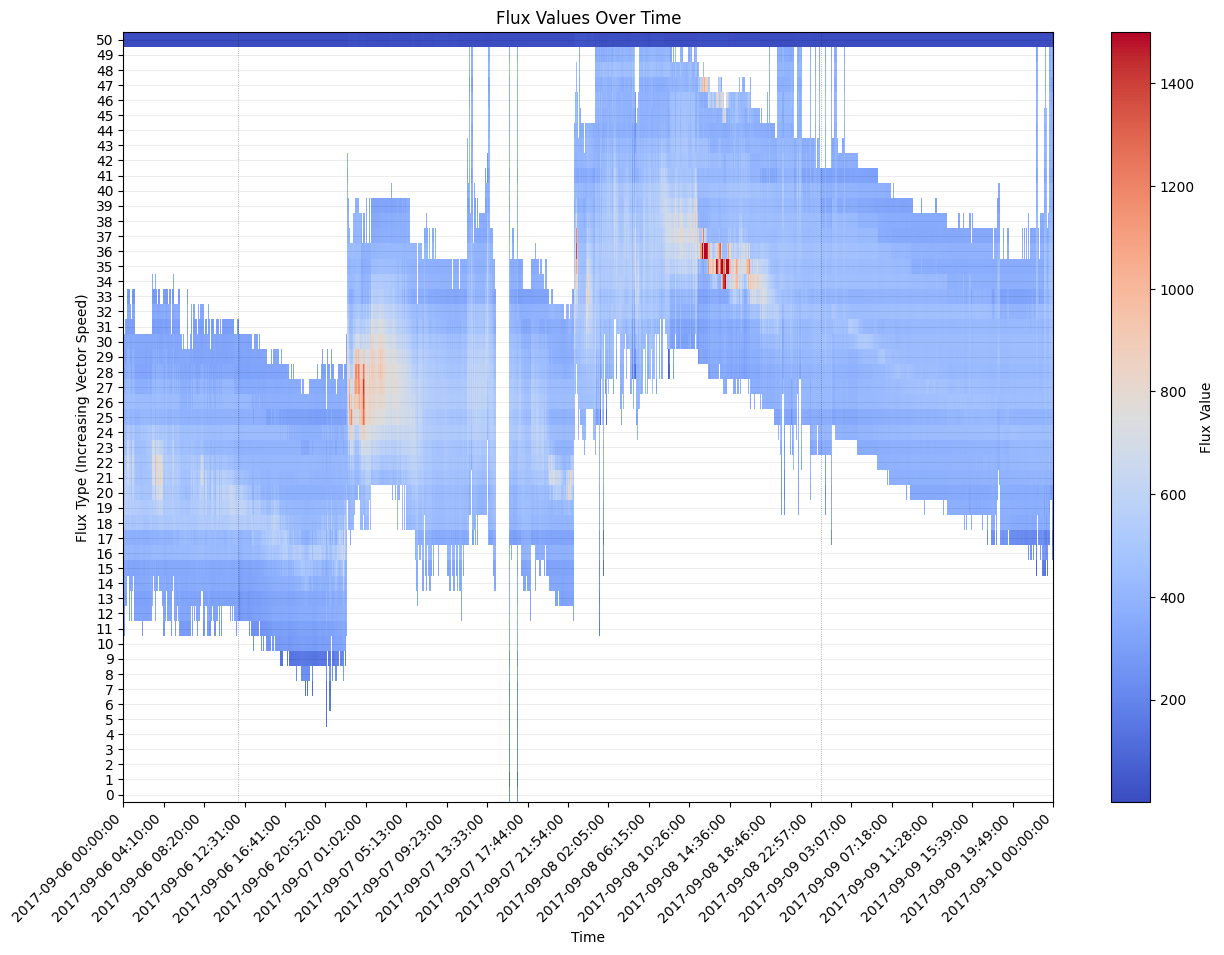

In [104]:
# Normalize the data using Min-Max scaling
#normalized_flux_data = (flux_data - flux_data.min()) / (flux_data.max() - flux_data.min())

# Define color normalization boundaries based on data percentiles
vmin = flux_data.min().min()  # Global minimum value
vmax = 1500 # Global Maximum value

# Plot the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(flux_data.iloc[:, :].T, cmap='coolwarm', aspect='auto', vmin=vmin, vmax=vmax)

# Set the x-axis limits (COMMENT this block if the entire year is desired)
start_date = '2017-09-06' # Pre Solar flare event
end_date = '2017-09-10' # Post Solar flare and the proceding geo-magnetic storm even has ended
start_pos = flux_data.index.get_loc(pd.Timestamp(start_date))
end_pos = flux_data.index.get_loc(pd.Timestamp(end_date))
ax.set_xlim(start_pos, end_pos)

# Set x-axis labels based on the specified range
ax.xaxis.set_ticks_position('bottom')
num_ticks = 24  # Number of time labels to display
positions = np.linspace(start_pos, end_pos, num_ticks).astype(int)  # Evenly spaced tick positions within the specified range
ax.set_xticks(positions)
ax.set_xticklabels(flux_data.index[positions], rotation=45, ha="right")


# Reverse the y-axis to have 0 at the bottom and higher vector speeds at the top
ax.set_ylim(ax.get_ylim()[::-1])  # Inverting the y-axis limits

# Add horizontal grid lines for each vector speed
ax.yaxis.set_ticks(np.arange(0, len(flux_data.columns), 1))
ax.grid(which='both', axis='y', linestyle='-', linewidth=0.5, color='k', alpha=0.1)

# Draw vertical grid lines for the specific dates in 2017 to check if the flux is corrolated to the 8th biggest solar flare event X9.3 2017-09-06 11:53am start time
specific_dates_2017 = ["2017-09-06 11:53:00", "2017-09-09 00:00:00"]
positions_2017 = [flux_data.index.get_loc(pd.Timestamp(date)) for date in specific_dates_2017]
for position in positions_2017:
    ax.axvline(x=position, linewidth=0.6, color='k',linestyle=':', alpha=0.4)

# Colorbar representing the actual range of flux values
colorbar = plt.colorbar(cax, label='Flux Value')

plt.title('Flux Values Over Time')
plt.xlabel('Time')
plt.ylabel('Flux Type (Increasing Vector Speed)')
plt.show()